**Part 1:** 

Use the **Fashion-MNIST** dataset for this question.

1a) Load the dataset and implement the K Means algorithm. You need to find the optimal number of clusters using the
> i) elbow method

> ii) silhoette method



1b) Define the initial clusters’ centroids using:</br>
> i) Forgy</br>

> ii) Random Partition

1c) Experiment with different distance measures [Euclidean distance, Manhattan distance].

1d) Plot the error vs number of clusters graph while using the elbow method and silhouette 
    method. Report the optimal number of clusters found.


1e) Visualize the dataset to depict the clusters formed. (prefer T-SNE)

</br>
</br>
</br>
</br>


**Part 2:**
</br>
In this task, you need to implement Hierarchical clustering (agglomerative) on the same dataset.

2a) visualize a dendogram and find out the optimal number of clusters with the help of Dendogram. Explain the procedure.


2b) Implement Hierarchical clustering using: </br>
> i) single linkage

> ii) Complete linkage

>Visualize the clusters obtained using these linkages and compare. 



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random


In [2]:
from keras.datasets import fashion_mnist
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()




# you can performs your training on train/test dataset alone if there are computational issues

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
print("The shape of the train set : {0}".format(trainX.shape))
print("The shape of the test set : {0}".format(testX.shape))


The shape of the train set : (60000, 28, 28)
The shape of the test set : (10000, 28, 28)


$$ \text{In Clustering you typically do not need a test set,so merge the two set} $$

In [4]:
dataset = np.zeros((trainX.shape[0] + testX.shape[0],trainX.shape[1],trainX.shape[2]))
dataset[0:trainX.shape[0],:,:] = trainX
dataset[trainX.shape[0]:,:,:] = testX
print(dataset.shape)

(70000, 28, 28)


In [5]:
flattened_data = dataset.reshape(dataset.shape[0],dataset.shape[1]*dataset.shape[2])
print(flattened_data.shape)

(70000, 784)


In [ ]:
#Data is (N,F)
def Forgy(data,K):
    indices = np.random.randint(0,data.shape[0],K)
    centroids = np.zeros((K,data.shape[1]))
    for i in range(K):
        centroids[i] = data[indices[i]]
    #print(centroids.shape)
    return centroids

In [ ]:
def Random_Partition(data,K):
  N = data.shape[0]
  #print(N)
  #print(K)
  #print(data.shape)
  centroids = np.zeros((K,data.shape[1]))
  #print("Centroids")
  #print(centroids.shape)
  labels = np.random.randint(0,K,N)
  for i in range(K):
    ind = np.where(labels == i)[0]
    #print("inds shape")
    #print(ind.shape)
    clusters = data[ind]
    #print("Cluster shape")
    #print(clusters.shape)
    mean = np.mean(clusters,axis = 0)
    #print("mean.shape")
    #print(mean.shape)
    centroids[i] = mean
  return centroids


In [ ]:
def Euclidean(a,b):
    return np.linalg.norm((a-b),2)


In [ ]:
def Manhattan(a,b):
    return np.linalg.norm((a-b),1)

In [ ]:
#implement elbow method from scratch
K_vals = [2,4,6,8,10,12]
def elbow(K_vals,initialisation,num_iter,eta,distance):
  Cost = []
  for k in K_vals:
    Cluster = Kmeans(flattened_data,k,initialisation,distance,num_iter,eta)
    cost = Cluster.Cost
    Cost.append(cost)
    print("Cost with respect to K = {0} is {1}".format(k,cost))
  plt.plot(K_vals,Cost)
  plt.xlabel("Value of K")
  plt.ylabel("SSE COST")
  


**1 A (i)> Elbow Method (Scroll down to the end of the output cell to see the graph)**

Iteration : 1 , Cost : 3589289.3854685547 and delta : 3589289.3854685547
Iteration : 2 , Cost : 3519651.06995306 and delta : -69638.3155154949
Iteration : 3 , Cost : 3507852.401266508 and delta : -11798.668686551973
Iteration : 4 , Cost : 3503997.8306457694 and delta : -3854.5706207384355
Iteration : 5 , Cost : 3502359.65483262 and delta : -1638.1758131491952
Iteration : 6 , Cost : 3501543.052636238 and delta : -816.6021963823587
Iteration : 7 , Cost : 3501068.6379753686 and delta : -474.41466086916625
Iteration : 8 , Cost : 3500815.6555134193 and delta : -252.98246194934472
Iteration : 9 , Cost : 3500643.3479575035 and delta : -172.30755591578782
Iteration : 10 , Cost : 3500557.70597678 and delta : -85.6419807234779
Iteration : 11 , Cost : 3500519.939805563 and delta : -37.76617121696472
Iteration : 12 , Cost : 3500488.422008845 and delta : -31.517796718049794
Iteration : 13 , Cost : 3500468.1674996032 and delta : -20.254509241785854
Iteration : 14 , Cost : 3500456.839038707 and delta

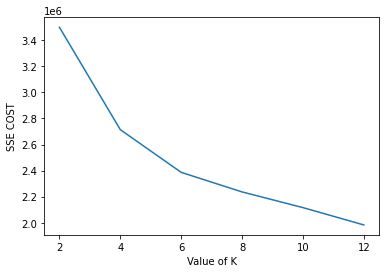

In [ ]:
elbow(K_vals,Forgy,30,1,"Euclidean")

Maybe 6 is the best cluster number


In [ ]:
#implement silhouette method from scratch
K_vals2 = [6,8,10,12,14]
def silhouette(K_vals,initialisation,num_iter,eta,distance):
  Y = []
  for k in K_vals:
    print("Starting to evaluate cluster size : {0}".format(k))
    clustered = Kmeans(flattened_data,k,initialisation,distance,num_iter,0.01)
    a = []
    b = []
    sil = []
    N = flattened_data.shape[0]
    for i in range(N):
      b = [0 for i in range(k)]
      sa = 0
      class_size = len(np.where(clustered.labels == i)[0])
      if(class_size > 1):
        for j in range(N):
          if(i != j):
            if(clustered.labels[i] == clustered.labels[j]):
              p_i = flattened_data[i]
              p_j = flattened_data[j]
              dist = np.linalg.norm((p_i - p_j),2)
              sa += dist
            else :
              j_class = clustered.labels[j]
              p_i = flattened_data[i]
              p_j = flattened_data[j]
              dist = np.linalg.norm((p_i - p_j),2)
              b[j_class] += dist
        for r in range(k):
            class_size = len(np.where(clustered.labels == r)[0])
            if(r == clustered.labels[i]):
              a.append(sa / (class_size - 1)) #not technically safe,doesn't handle cases when class size == 1 or class size == 0
              b[r] = 1e18
            else:
              b[r] = b[r] / class_size #not technically safe,doesn't handle cases when class size == 0
        b = min(b)
        s = (b - a[i])/max(b,a[i])
        sil.append(s)
      else :
        sil.append(0)
    score = np.mean(sil)
    print("Silhouette score for cluster size {0} is {1}".format(k,score))
    Y.append(score)
  plt.plot(K_vals,Y)
  plt.xlabel("K ")
  plt.ylabel("Silhouette score")  
  plt.title("Silhouette plot for K means with distance metric " + distance + "Forgy Initialization" )









  **1 A (ii)>Silhouette Method(Scroll down to the bottom of the output cell to see the graph )**

Starting to evaluate cluster size : 6
Iteration : 1 , Cost : 3031092.856966045 and delta : 3031092.856966045
Iteration : 2 , Cost : 2675583.8888946963 and delta : -355508.96807134897
Iteration : 3 , Cost : 2594494.8609452415 and delta : -81089.02794945473
Iteration : 4 , Cost : 2567828.0369709227 and delta : -26666.823974318802
Iteration : 5 , Cost : 2558473.0338059515 and delta : -9355.003164971247
Iteration : 6 , Cost : 2553249.83063712 and delta : -5223.2031688313
Iteration : 7 , Cost : 2548834.835480784 and delta : -4414.99515633611
Iteration : 8 , Cost : 2543098.988562466 and delta : -5735.846918317955
Iteration : 9 , Cost : 2530537.703310792 and delta : -12561.285251674242
Iteration : 10 , Cost : 2516094.97801329 and delta : -14442.725297501776
Iteration : 11 , Cost : 2504954.1432679514 and delta : -11140.834745338652
Iteration : 12 , Cost : 2490517.36418146 and delta : -14436.779086491559
Iteration : 13 , Cost : 2466077.806519185 and delta : -24439.55766227469
Iteration : 14 , C

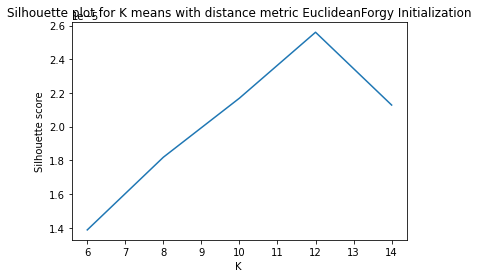

In [ ]:
silhouette(K_vals2,Forgy,20,0.01,"Euclidean")

The ideal cluster size for this particular method is size = 12


In [ ]:
sample_data = np.random.randint(0,1000,(1000,2))
print(sample_data.shape)

(1000, 2)


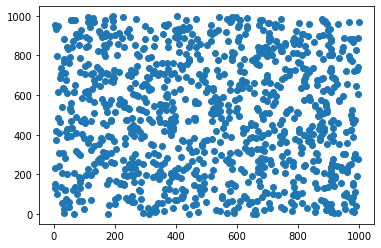

In [ ]:
plt.scatter(sample_data[:,0],sample_data[:,1])

In [ ]:
#implement Kmeans from scratch
class Kmeans:
    
    

    def __init__(self,data,K,initialization,distance,num_iteration,eta):
        #the data must be 2D (N,F) where F is the number of Features
        self.centroids = initialization(data,K) #returns a point with dimension (N,28*28) and label i : (0,K)
        self.data = data
        self.F = data.shape[1]
        self.N = data.shape[0]
        self.K = K
        #print(self.data.shape)
        self.distance = distance
        self.labels = np.random.randint(0,self.K,self.N)
        #print(self.labels)
        #print("")
        self.stop = True
        
        self.eta = eta
        self.num_iteration = num_iteration
        self.Cost = 1e18
        self.cluster()
        
    
    def compute_minimum_distance(self,x,current_id):
        
        if(self.distance == "Euclidean"):
            r = (self.centroids - x)**2
            val = np.sum(r,axis = 1)
            mini = np.argmin(val)
            #if(mini >= self.K):
                #print(val.shape)
                #print(val)
            return mini
        elif(self.distance == "Manhattan"):
            r = np.abs(self.centroids - x)
            val = np.sum(r,axis = 1)
            return np.argmin(val)
            
        
            
                
        
    
    
    def find_new_centroids(self):
        new_centroids = np.zeros((self.K,self.F))
        Cost = 0
        for i in range(self.K):
            ind = np.where(self.labels == i)
            arr = self.data[ind] # (R,F)
            new_centroid = np.mean(arr,axis = 0)
            #print("new_Centroid1 ",new_centroid.shape)
            new_centroid = new_centroid.reshape((1,self.F))
            new_centroids[i] = new_centroid
            #print("new_Centroid ",new_centroid.shape)
            C = np.sum((arr - new_centroid)**2)
            Cost = Cost + C
         
        #print(np.sum(new_centroids - self.centroids))
        #print("New Centroids")
        #print(new_centroids)
        #print(new_centroids - self.centroids)
        #print("")
        if(np.abs(np.sum(new_centroids - self.centroids)) >= self.eta):
            
            self.stop = False
        self.centroids = new_centroids
        
        return Cost/self.N
    
    
    
    
        
        
            
            
     #def get_final_cost(self):

        
        
        
    def cluster(self):
        import time
        old_cost = 0
        for i in range(self.num_iteration):
            #print("Centroids : ")
            #print(self.centroids)
            #print("")
            
            #print(np.unique(self.labels))
            t1 = time.time()
            #print("Labels")
            #print(self.labels)
            #print("")
            for j in range(self.N):
                
                #print(i,j)
                x = self.data[j]
                
                new_id = self.compute_minimum_distance(x,self.labels[j])
                self.labels[j] = new_id
                #print(new_id)
            #print("New Labels")
            #print(self.labels)
            #print("")
            Cost = self.find_new_centroids()
            Diff = Cost - old_cost
            self.Cost = Cost
            old_cost = Cost
            if(Diff == 0):
                self.stop = True
            
            #print("Time taken : {0}".format(time.time() - t1))
            if(self.stop == True ):
                print("No change in centroids,stopping at iteration : {0} with cost {1} and delta {2} ".format(i,Cost,Diff))
              
                #return Cost
                self.Cost = Cost
            if(i == self.num_iteration - 1):
                print("All Iterations done,Final Cost : {0}".format(Cost))
                #return Cost
                self.Cost = Cost
            else:
                self.stop = False
                print("Iteration : {0} , Cost : {1} and delta : {2}".format(i + 1,Cost,Diff))
            
        
        
    
    
    


  

In [ ]:
sample = Kmeans(sample_data,2,Forgy,'Euclidean',100,0.0001)

Iteration : 1 , Cost : 112874.26476963394 and delta : 112874.26476963394
Iteration : 2 , Cost : 109584.00285691694 and delta : -3290.2619127170037
Iteration : 3 , Cost : 107400.24739790635 and delta : -2183.7554590105865
Iteration : 4 , Cost : 105902.86637935173 and delta : -1497.3810185546172
Iteration : 5 , Cost : 105176.27326882168 and delta : -726.5931105300551
Iteration : 6 , Cost : 104868.17036879728 and delta : -308.1029000244016
Iteration : 7 , Cost : 104827.93614421441 and delta : -40.234224582862225
Iteration : 8 , Cost : 104822.28159996 and delta : -5.6545442544156685
Iteration : 9 , Cost : 104820.55491552383 and delta : -1.7266844361729454
No change in centroids,stopping at iteration : 9 with cost 104820.55491552383 and delta 0.0 


No handles with labels found to put in legend.


length of labels  0 is 494
length of labels  1 is 506


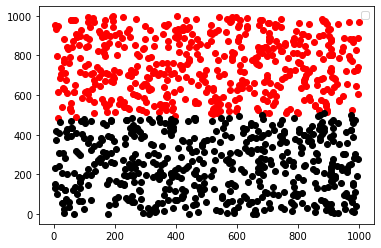

In [ ]:
colors = ["red","black","blue","green","yellow","grey","pink","violet","brown","orange"]
for i in range(sample.K):
    n_indices = np.where(sample.labels == i)
    data = sample.data[n_indices]
    plt.scatter(data[:,0],data[:,1],color = colors[i])
    
    print("length of labels  {0} is {1}".format(i,data.shape[0]))
plt.legend()
plt.show()

**FORGY AND EUCLIDEAN(SCROLL DOWN TO THE BOTTOM OF OUTPUT CELL TO VISUALIZE THE CLUSTERING)**

Iteration : 1 , Cost : 2546854.011482391 and delta : 2546854.011482391
Iteration : 2 , Cost : 2315325.725061612 and delta : -231528.28642077884
Iteration : 3 , Cost : 2238670.060302577 and delta : -76655.66475903522
Iteration : 4 , Cost : 2181556.4807282076 and delta : -57113.57957436936
Iteration : 5 , Cost : 2152744.2232057494 and delta : -28812.25752245821
Iteration : 6 , Cost : 2135832.027557604 and delta : -16912.195648145396
Iteration : 7 , Cost : 2125888.3590333983 and delta : -9943.668524205685
Iteration : 8 , Cost : 2120698.377897129 and delta : -5189.981136269402
Iteration : 9 , Cost : 2118273.9969253046 and delta : -2424.3809718242846
Iteration : 10 , Cost : 2117120.9816375617 and delta : -1153.01528774295
Iteration : 11 , Cost : 2116471.0120598082 and delta : -649.9695777534507
Iteration : 12 , Cost : 2115970.0069171055 and delta : -501.00514270272106
Iteration : 13 , Cost : 2115459.540589472 and delta : -510.4663276337087
Iteration : 14 , Cost : 2114846.0045633195 and delt

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
No handles with labels found to put in legend.


Time taken for Dimensionality Reduction : 28.961234092712402
(10000, 1)
(10000, 2)
length of labels  0 is 1232
length of labels  1 is 1583
length of labels  2 is 1489
length of labels  3 is 1316
length of labels  4 is 1194
length of labels  5 is 455
length of labels  6 is 415
length of labels  7 is 701
length of labels  8 is 1194
length of labels  9 is 421


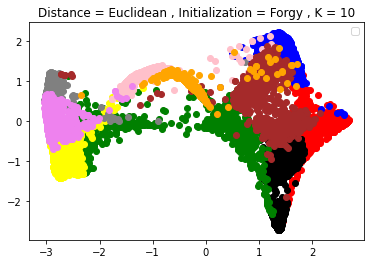

In [ ]:
Clustering = Kmeans(flattened_data,10,Forgy,'Euclidean',50,0.0001)
''' pick a random subset of data points for visualization as running TSNE in all of them takes a lot of them '''
indices =  np.random.choice(range(0, 70000), replace = True, size = 10000)
selected_data = flattened_data[indices]
print(selected_data.shape,selected_data.dtype)
''' visualizing the clusters formed'''
from sklearn.manifold import TSNE
import time
t = time.time()
embedded_data = TSNE(n_components=2,n_iter = 250,init='random').fit_transform(selected_data.astype(np.float64))
t2 = time.time()
print("Time taken for Dimensionality Reduction : {0}".format(t2 - t))
clustered_data = []
labels = []
for i in range(10000):
    indice = indices[i]
    data = embedded_data[i]
    label = Clustering.labels[indice]
    clustered_data.append(data)
    labels.append(label)
labels = np.array(labels).reshape((len(labels),1))
labels = labels[:]

clustered_data = np.array(clustered_data)
print(labels.shape)
print(clustered_data.shape)
colors = ["red","black","blue","green","yellow","grey","pink","violet","brown","orange"]
for i in range(Clustering.K):
    indices,_ = np.where(labels == i)
    data = clustered_data[indices]
    plt.scatter(data[:,0],data[:,1],color = colors[i])
    
    print("length of labels  {0} is {1}".format(i,data.shape[0]))
plt.title("Distance = Euclidean , Initialization = Forgy , K = 10")
plt.legend()
plt.show()

**FORGY AND MANHATTAN(SCROLL DOWN TO THE BOTTOM OF OUTPUT CELL TO VISUALIZE THE CLUSTERING)**

Iteration : 1 , Cost : 2336401.006326724 and delta : 2336401.006326724
Iteration : 2 , Cost : 2223377.514303415 and delta : -113023.49202330876
Iteration : 3 , Cost : 2211181.861457316 and delta : -12195.652846098877
Iteration : 4 , Cost : 2199668.529699741 and delta : -11513.331757575274
Iteration : 5 , Cost : 2190031.5291139395 and delta : -9637.000585801434
Iteration : 6 , Cost : 2183263.917986604 and delta : -6767.611127335578
Iteration : 7 , Cost : 2178247.201543335 and delta : -5016.716443269048
Iteration : 8 , Cost : 2174924.5319524207 and delta : -3322.6695909141563
Iteration : 9 , Cost : 2172399.8578544753 and delta : -2524.674097945448
Iteration : 10 , Cost : 2172095.9017729564 and delta : -303.9560815189034
Iteration : 11 , Cost : 2173091.3425509743 and delta : 995.4407780179754
Iteration : 12 , Cost : 2174139.2181284134 and delta : 1047.8755774390884
Iteration : 13 , Cost : 2175526.034088888 and delta : 1386.815960474778
Iteration : 14 , Cost : 2175213.1477233195 and delta 

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
No handles with labels found to put in legend.


Time taken for Dimensionality Reduction : 29.68704342842102
(10000, 1)
(10000, 2)
length of labels  0 is 855
length of labels  1 is 420
length of labels  2 is 2186
length of labels  3 is 382
length of labels  4 is 1351
length of labels  5 is 584
length of labels  6 is 375
length of labels  7 is 1098
length of labels  8 is 907
length of labels  9 is 1842


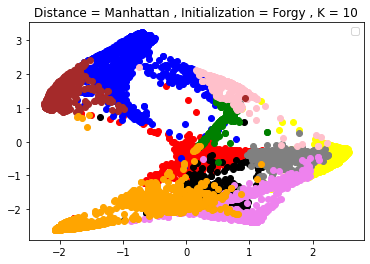

In [ ]:
Clustering1 = Kmeans(flattened_data,10,Forgy,'Manhattan',50,0.0001)
t = time.time()
''' pick a random subset of data points for visualization as running TSNE in all of them takes a lot of them '''
indices =  np.random.choice(range(0, 70000), replace = True, size = 10000)
selected_data = flattened_data[indices]
print(selected_data.shape,selected_data.dtype)
embedded_data = TSNE(n_components=2,n_iter = 250,init='random').fit_transform(selected_data.astype(np.float64))
t2 = time.time()
print("Time taken for Dimensionality Reduction : {0}".format(t2 - t))
clustered_data = []
labels = []
for i in range(10000):
    indice = indices[i]
    data = embedded_data[i]
    label = Clustering1.labels[indice]
    clustered_data.append(data)
    labels.append(label)
labels = np.array(labels).reshape((len(labels),1))
labels = labels[:]

clustered_data = np.array(clustered_data)
print(labels.shape)
print(clustered_data.shape)
colors = ["red","black","blue","green","yellow","grey","pink","violet","brown","orange"]
for i in range(Clustering1.K):
    indices,_ = np.where(labels == i)
    data = clustered_data[indices]
    plt.scatter(data[:,0],data[:,1],color = colors[i])
    
    print("length of labels  {0} is {1}".format(i,data.shape[0]))
plt.title("Distance = Manhattan , Initialization = Forgy , K = 10")
plt.legend()
plt.show()

**RANDOM PARTITION AND EUCLIDEAN(SCROLL DOWN TO THE BOTTOM OF OUTPUT CELL TO VISUALIZE THE CLUSTERING)**

Iteration : 1 , Cost : 2893897.9891707883 and delta : 2893897.9891707883
Iteration : 2 , Cost : 2355064.924384083 and delta : -538833.0647867052
Iteration : 3 , Cost : 2257656.533559371 and delta : -97408.39082471235
Iteration : 4 , Cost : 2208027.258471343 and delta : -49629.275088027585
Iteration : 5 , Cost : 2168233.8800600916 and delta : -39793.378411251586
Iteration : 6 , Cost : 2133684.1569097545 and delta : -34549.723150337115
Iteration : 7 , Cost : 2114126.3312878436 and delta : -19557.82562191086
Iteration : 8 , Cost : 2108141.1660410916 and delta : -5985.165246752091
Iteration : 9 , Cost : 2104595.5341362883 and delta : -3545.6319048032165
Iteration : 10 , Cost : 2102154.3792369235 and delta : -2441.154899364803
Iteration : 11 , Cost : 2100393.03276582 and delta : -1761.346471103374
Iteration : 12 , Cost : 2098942.1676937453 and delta : -1450.865072074812
Iteration : 13 , Cost : 2097601.979610988 and delta : -1340.188082757406
Iteration : 14 , Cost : 2096265.2762237175 and de

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
No handles with labels found to put in legend.


Time taken for Dimensionality Reduction : 29.65386652946472
(10000, 1)
(10000, 2)
length of labels  0 is 1278
length of labels  1 is 1036
length of labels  2 is 390
length of labels  3 is 1026
length of labels  4 is 1272
length of labels  5 is 1211
length of labels  6 is 1225
length of labels  7 is 1471
length of labels  8 is 676
length of labels  9 is 415


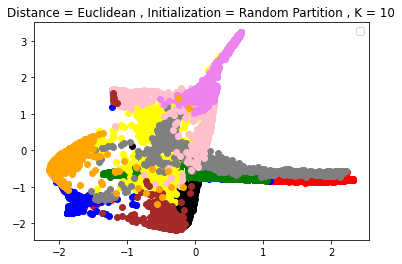

In [ ]:
Clustering1 = Kmeans(flattened_data,10,Random_Partition,'Euclidean',50,0.0001)
t = time.time()
''' pick a random subset of data points for visualization as running TSNE in all of them takes a lot of them '''
indices =  np.random.choice(range(0, 70000), replace = True, size = 10000)
selected_data = flattened_data[indices]
print(selected_data.shape,selected_data.dtype)
embedded_data = TSNE(n_components=2,n_iter = 250,init='random').fit_transform(selected_data.astype(np.float64))
t2 = time.time()
print("Time taken for Dimensionality Reduction : {0}".format(t2 - t))
clustered_data = []
labels = []
for i in range(10000):
    indice = indices[i]
    data = embedded_data[i]
    label = Clustering1.labels[indice]
    clustered_data.append(data)
    labels.append(label)
labels = np.array(labels).reshape((len(labels),1))
labels = labels[:]

clustered_data = np.array(clustered_data)
print(labels.shape)
print(clustered_data.shape)
colors = ["red","black","blue","green","yellow","grey","pink","violet","brown","orange"]
for i in range(Clustering1.K):
    indices,_ = np.where(labels == i)
    data = clustered_data[indices]
    plt.scatter(data[:,0],data[:,1],color = colors[i])
    
    print("length of labels  {0} is {1}".format(i,data.shape[0]))
plt.title("Distance = Euclidean , Initialization = Random Partition , K = 10")
plt.legend()
plt.show()

Hierarchical clustering

In [ ]:
!pip3 install sklearn

In [28]:
pip install -U scikit-learn

In [11]:
#print(flattened_data.shape)
new_size = 3000
indices = np.random.choice(flattened_data.shape[0],new_size, replace = False)
new_data = flattened_data[indices]
#print(new_data.shape)
#print(indices.shape,len(np.unique(indices)),np.max(indices),np.min(indices))


(3000, 784)


In [69]:
# implement hierarchical clustering ( you can use scikit module)
from sklearn.cluster import AgglomerativeClustering as HCluster
from scipy.cluster.hierarchy import dendrogram
#euclidean affinity is used as default
#reduce data size for faster computation 

def hierarchical_clustering(thresh,Linkage = "single"):
  model1 = HCluster(distance_threshold = thresh, n_clusters = None,linkage = Linkage)
  model1 = model1.fit(new_data)
  print("Clustering done")
  print("Number of clusters found : {0}".format(model1.n_clusters_))
  plt.title("Dendogram")
  dendogram(model1)
  return model1




In [64]:
#visualize a dendogram
# the code is heavily borrowed from sklearn docs.


def dendogram(model,**kwargs):
  # create a linkage matrix
  # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0]) 
    n_samples = len(model.labels_) # total number of samples
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    #final linkage matrix
    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


  

In [ ]:
#visualisation of clusters using single linkage and complete linkage

In [80]:
from sklearn.manifold import TSNE


Single Linkage Visualization

Clustering done
Number of clusters found : 23


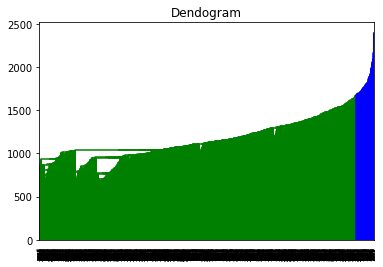

In [78]:
import sys
sys.setrecursionlimit(10**8)

model1 = hierarchical_clustering(2000,Linkage = "single")

Complete Linkage Visualization Using Dendogram

Clustering done
Number of clusters found : 10


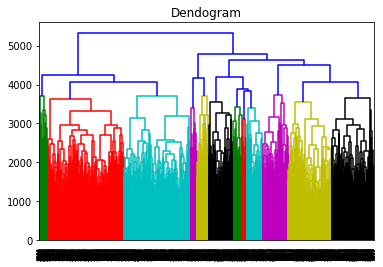

In [92]:
model2 = hierarchical_clustering(4000,Linkage = "complete")

**Question**: Explain the procedure to find the optimal number of clusters using dendogram

Answer: 
The way to compute the optimal number of cluster is to look at the maximum vertical distances between the nodes.The optimal number of cluster is the number of vertical lines that you can see in the distance




**Question:** Mention the differences observed using single and complete linkage:

Answer: One gets more number of cluster for similar distance threshold in Complete Linkage than simple Linkage.